<a href="https://colab.research.google.com/github/Sentiago22/Data-analyst/blob/main/report_vsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Import packages and load data

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Sales2019.csv/sales2019_1.csv")

In [ ]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


Task 2: Clean and Preprocess data

In [ ]:
path = '/content/Sales2019.csv'
os.listdir(path)

['sales2019_9.csv',
 'sales2019_1.csv',
 'sales2019_6.csv',
 'sales2019_5.csv',
 'sales2019_2.csv',
 'sales2019_12.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_3.csv',
 'sales2019_7.csv',
 'sales2019_4.csv',
 'sales2019_8.csv']

In [ ]:
#from pandas.io.sas.sasreader import FilePath
#filepath = []
frames = []
all_length = []
for file in os. listdir(path):
  if file.endswith('.csv'):
    #filepath = path + file
    #df1 = pd.read_csv(filepath)
    filepath = os.path.join(path, file)  # Sử dụng os.path.join để tạo đường dẫn đúng
    df1 = pd.read_csv(filepath)
    frames.append (df1)
    result = pd.concat(frames)
    length_1month = len(df1.index)
    all_length. append (length_1month )
    df2 = result
    #result = pd.concat(frames)
    df2.to_csv('annualSales2019.csv', index=False)

In [ ]:
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [ ]:
print(all_length)

[11686, 9723, 13622, 16635, 12036, 25117, 20379, 17661, 15226, 14371, 18383, 12011]


In [ ]:
print(sum(all_length))

186850


Task 2.1 Add 'Month' column

In [ ]:
df2['Month'] = df2['Order Date'].str[0:2]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [ ]:
print(set(df2['Month']))

{'02', '05', '06', '12', '10', '09', '01', '11', '08', '03', '07', '04'}


Task 2.2: Get rid of 'nan' and 'Or' value

In [ ]:
df2 = df2.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [ ]:
df2 = df2[df2['Month'] != 'Or']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


Task 3: Reporting

Task 3.1: What was the best month for sales? How much was earned that month?

In [ ]:
print(df2['Quantity Ordered'].dtypes)
print(df2['Price Each'].dtypes)

int8
float32


In [ ]:
df2['Quantity Ordered'] = pd.to_numeric(df2['Quantity Ordered'], downcast='integer')
df2['Price Each'] = pd.to_numeric(df2['Price Each'], downcast='float')

In [ ]:
df2['Sales'] = df2['Quantity Ordered'] * df2['Price Each']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.840000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09,15.360000
1,248152,USB-C Charging Cable,2,11.950000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09,23.900000
2,248153,USB-C Charging Cable,1,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09,11.950000
3,248154,27in FHD Monitor,1,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09,149.990005
4,248155,USB-C Charging Cable,1,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09,11.950000


In [ ]:
moving_colum = df2.pop('Sales')
df2.insert(4, 'Sales', moving_colum)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.950000,23.900000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.950000,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.990005,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.950000,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [ ]:
#df2.groupby('Month').sum()['Sales']
df2.groupby('Month')['Sales'].sum()

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [ ]:
#sales_value = df2.groupby('Month').sum()['Sales']
#sales_value.max()
sales_value = df2.groupby('Month')['Sales'].sum()
sales_value.max()

4613443.5

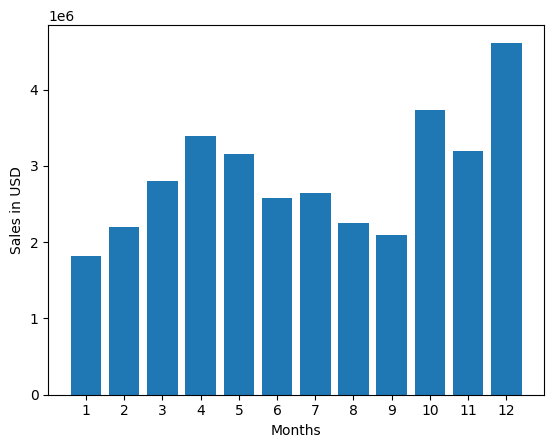

In [ ]:
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

Task 3.2: What city has the best sales?

In [ ]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.950000,23.900000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.950000,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.990005,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.950000,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [ ]:
address_to_city = lambda address:address.split(',')[1]

In [ ]:
df2['City'] = df2['Purchase Address'].apply(address_to_city)
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09,Los Angeles
1,248152,USB-C Charging Cable,2,11.950000,23.900000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09,Austin
2,248153,USB-C Charging Cable,1,11.950000,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09,Los Angeles
3,248154,27in FHD Monitor,1,149.990005,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09,Seattle
4,248155,USB-C Charging Cable,1,11.950000,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09,Atlanta


In [ ]:
df2.groupby('City')['Sales'].sum()

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [ ]:
sales_value_city = df2.groupby('City')['Sales'].sum()
sales_value.max()

8262204.0

In [ ]:
cities = [city for city,sales in sales_value_city.items()]

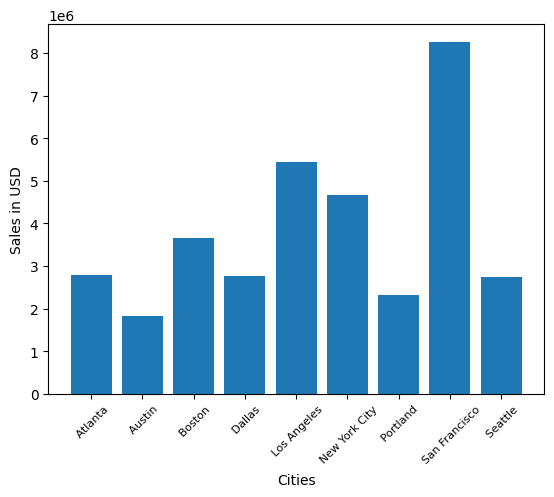

In [ ]:
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=45, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

In [ ]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09,Los Angeles
1,248152,USB-C Charging Cable,2,11.950000,23.900000,09/29/19 10:19,"511 8th St, Austin, TX 73301",09,Austin
2,248153,USB-C Charging Cable,1,11.950000,11.950000,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09,Los Angeles
3,248154,27in FHD Monitor,1,149.990005,149.990005,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09,Seattle
4,248155,USB-C Charging Cable,1,11.950000,11.950000,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09,Atlanta


In [ ]:
df2['Order Date'] = pd.to_datetime(df2['Order Date'])

In [ ]:
print(df2['Order Date'].dtypes)

datetime64[ns]


In [ ]:
df2['Hours'] = df2['Order Date'].dt.hour
df2

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",09,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.950000,23.900000,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",09,Austin,10
2,248153,USB-C Charging Cable,1,11.950000,11.950000,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",09,Los Angeles,17
3,248154,27in FHD Monitor,1,149.990005,149.990005,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",09,Seattle,7
4,248155,USB-C Charging Cable,1,11.950000,11.950000,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",09,Atlanta,19
...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.989998,99.989998,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",08,San Francisco,22
12007,248147,AAA Batteries (4-pack),3,2.990000,8.970000,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",08,Boston,16
12008,248148,AA Batteries (4-pack),1,3.840000,3.840000,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",08,Seattle,7
12009,248149,USB-C Charging Cable,1,11.950000,11.950000,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",08,San Francisco,12


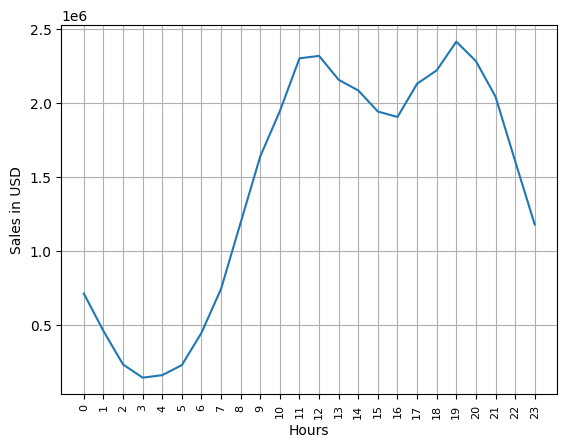

In [ ]:
#from pandas.tseries.offsets import Hour
sales_value_hours = df2.groupby('Hours')['Sales'].sum()
hours = [hour for hour,sales in sales_value_hours.items()]
plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()


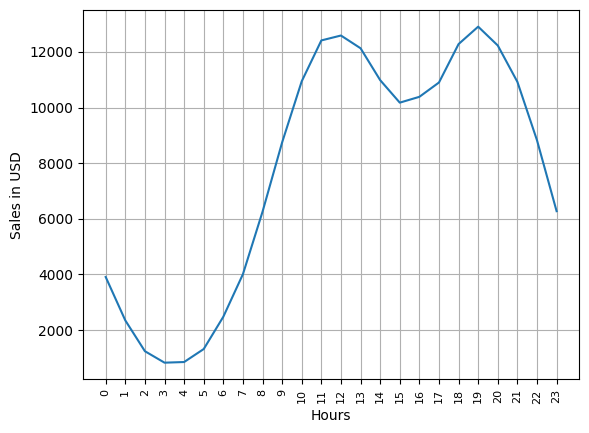

In [ ]:
sales_value_hours = df2.groupby('Hours')['Sales'].count()
hours = [hour for hour,sales in sales_value_hours.items()]
plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

Task 3.4: What products are most often sold together?

In [ ]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",09,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.950000,23.900000,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",09,Austin,10
2,248153,USB-C Charging Cable,1,11.950000,11.950000,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",09,Los Angeles,17
3,248154,27in FHD Monitor,1,149.990005,149.990005,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",09,Seattle,7
4,248155,USB-C Charging Cable,1,11.950000,11.950000,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",09,Atlanta,19


In [ ]:
df_dup = df2[df2['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
20,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15
21,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15
60,248210,iPhone,1,700.000000,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10
61,248210,Lightning Charging Cable,1,14.950000,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10
70,248219,Bose SoundSport Headphones,1,99.989998,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",09,Los Angeles,12


In [ ]:
groupProduct = lambda product: ', '.join(product)

In [ ]:
#df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
#df_dup.head()
df_final = df_dup.copy()
df_final['All Products'] = df_final.groupby('Order ID')['Product'].transform(groupProduct)
df_final.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
20,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15,"USB-C Charging Cable, USB-C Charging Cable"
21,248171,USB-C Charging Cable,1,11.950000,11.950000,2019-09-05 15:06:00,"705 Hill St, New York City, NY 10001",09,New York City,15,"USB-C Charging Cable, USB-C Charging Cable"
60,248210,iPhone,1,700.000000,700.000000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10,"iPhone, Lightning Charging Cable"
61,248210,Lightning Charging Cable,1,14.950000,14.950000,2019-09-27 10:33:00,"292 Washington St, San Francisco, CA 94016",09,San Francisco,10,"iPhone, Lightning Charging Cable"
70,248219,Bose SoundSport Headphones,1,99.989998,99.989998,2019-09-24 12:48:00,"665 Maple St, Los Angeles, CA 90001",09,Los Angeles,12,"Bose SoundSport Headphones, Google Phone"


In [ ]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
20,248171,"USB-C Charging Cable, USB-C Charging Cable"
60,248210,"iPhone, Lightning Charging Cable"
70,248219,"Bose SoundSport Headphones, Google Phone"
117,248265,"Vareebadd Phone, Bose SoundSport Headphones"
176,248323,"Google Phone, Bose SoundSport Headphones"
...,...,...
11908,248053,"AA Batteries (4-pack), 20in Monitor"
11924,248068,"Bose SoundSport Headphones, AA Batteries (4-pack)"
11945,248088,"ThinkPad Laptop, Bose SoundSport Headphones"
11963,248105,"Google Phone, Wired Headphones"


In [ ]:
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

Task 3.5: What product sold the most? Why do you think it sold the most?

In [ ]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,248151,AA Batteries (4-pack),4,3.840000,15.360000,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",09,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.950000,23.900000,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",09,Austin,10
2,248153,USB-C Charging Cable,1,11.950000,11.950000,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",09,Los Angeles,17
3,248154,27in FHD Monitor,1,149.990005,149.990005,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",09,Seattle,7
4,248155,USB-C Charging Cable,1,11.950000,11.950000,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",09,Atlanta,19


In [ ]:
all_products = df2.groupby('Product')['Quantity Ordered'].sum()
all_products

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [ ]:
price = df2.groupby('Product')['Price Each'].mean()
price

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.990021
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.990021
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

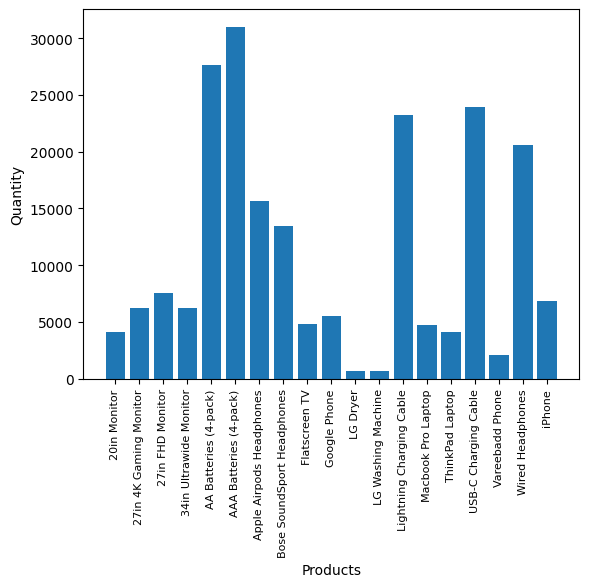

In [ ]:
#products_ls = df2.groupby('Hours')['Sales'].sum()
products_ls = [product for product,quant in all_products.items()]
plt.bar(products_ls,all_products)
plt.xticks(products_ls, rotation=90, size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

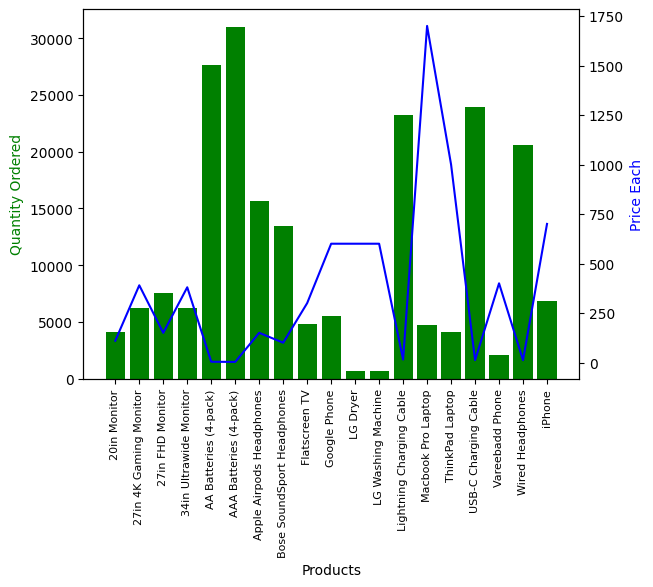

In [207]:
# price
x = products_ls
y1 = all_products
y2 = price
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2,'b-')

ax1.set_xticks(x)
ax1.set_xticklabels (products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price Each', color='b')

plt. show( )